In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle

In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns

In [3]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [5]:
customer_df = pd.read_csv('customers.csv')

In [6]:
customer_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [7]:
customer_df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [8]:
customer_df.shape

(10695, 11)

In [9]:
customer_df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [10]:
customer_df_cleaned = customer_df.dropna(axis=0)

In [11]:
customer_df_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [12]:
customer_df_cleaned.shape

(8819, 11)

In [13]:
customer_df_cleaned.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [14]:
customer_df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
customer_df_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
customer_df_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
customer_df_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [18]:
customer_df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [19]:
customer_df_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [20]:
customer_df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [21]:
categories_list=[['Male', 'Female'],
           ['No', 'Yes'],
           ['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']
           ]
enc = OrdinalEncoder(categories=categories_list)

In [22]:
customers_1 = customer_df_cleaned.copy()

In [23]:
customers_1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(customers_1[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])

In [24]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [25]:
le = LabelEncoder()

In [26]:
customers_1['Segmentation'] = le.fit_transform(customers_1['Segmentation'])

In [27]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

In [28]:
customers_1 = customers_1.drop('ID',axis=1)
customers_1 = customers_1.drop('Var_1',axis=1)

In [29]:
customers_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [30]:
customers_1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,0.448804,0.591450,43.517859,0.634312,3.287561,2.610160,0.544846,2.840118,1.518086
std,0.497400,0.491594,16.581537,0.481650,2.346652,3.390676,0.738487,1.535051,1.146645
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,41.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [31]:
customers_1['Segmentation'].unique()

array([3, 1, 2, 0])

In [32]:
X=customers_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values

In [33]:
y1 = customers_1[['Segmentation']].values

In [34]:
one_hot_enc = OneHotEncoder()

In [35]:
one_hot_enc.fit(y1)

OneHotEncoder()

In [36]:
y1.shape

(8819, 1)

In [37]:
y = one_hot_enc.transform(y1).toarray()

In [38]:
y.shape

(8819, 4)

In [39]:
y1[0]

array([3])

In [40]:
y[0]

array([0., 0., 0., 1.])

In [41]:
X.shape

(8819, 8)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=50)

In [43]:
X_train[0]

array([ 1.,  1., 85.,  0.,  2.,  0.,  0.,  1.])

In [44]:
X_train.shape

(5908, 8)

In [45]:
scaler_age = MinMaxScaler()

In [46]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [47]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [48]:
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [49]:
# Creating the model
ai_brain = Sequential([
Dense(8,input_shape=(8,)),
Dense(8,activation='relu'),
Dense(8,activation='relu'),
Dense(4,activation='softmax'),
])



In [50]:
ai_brain.compile(optimizer='adam',
                 loss= 'categorical_crossentropy',
                 metrics=['accuracy'])

In [51]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [54]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=20,batch_size=25,
             validation_data=(X_test_scaled,y_test),
             )

Epoch 1/20
237/237 [==============================] - 3s 7ms/step - loss: 1.3632 - accuracy: 0.3174 - val_loss: 1.3523 - val_accuracy: 0.3205
Epoch 2/20
237/237 [==============================] - 1s 3ms/step - loss: 1.3284 - accuracy: 0.3477 - val_loss: 1.3221 - val_accuracy: 0.3411
Epoch 3/20
237/237 [==============================] - 1s 3ms/step - loss: 1.2991 - accuracy: 0.3852 - val_loss: 1.2992 - val_accuracy: 0.4150
Epoch 4/20
237/237 [==============================] - 1s 3ms/step - loss: 1.2777 - accuracy: 0.4311 - val_loss: 1.2842 - val_accuracy: 0.4215
Epoch 5/20
237/237 [==============================] - 1s 4ms/step - loss: 1.2629 - accuracy: 0.4365 - val_loss: 1.2754 - val_accuracy: 0.4253
Epoch 6/20
237/237 [==============================] - 1s 4ms/step - loss: 1.2505 - accuracy: 0.4406 - val_loss: 1.2656 - val_accuracy: 0.4318
Epoch 7/20
237/237 [==============================] - 1s 3ms/step - loss: 1.2433 - accuracy: 0.4430 - val_loss: 1.2527 - val_accuracy: 0.4394
Epoch 

In [55]:
metrics = pd.DataFrame(ai_brain.history.history)

In [57]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.363192,0.317366,1.352289,0.320508
1,1.328448,0.347664,1.322081,0.341120
2,1.299114,0.385240,1.299191,0.414978
3,1.277723,0.431110,1.284178,0.421505
4,1.262876,0.436527,1.275373,0.425283


<Axes: >

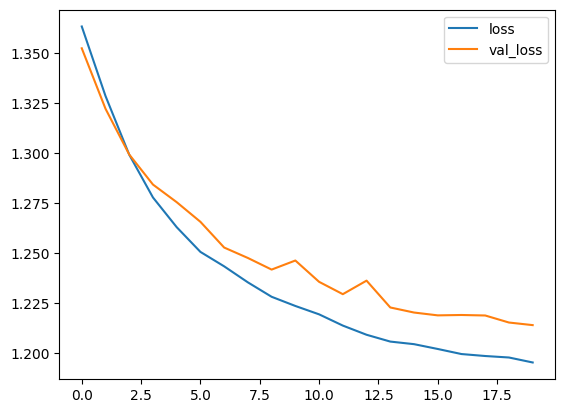

In [58]:
metrics[['loss','val_loss']].plot()

In [59]:
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)

91/91 [==============================] - 1s 4ms/step


In [60]:
x_test_predictions.shape

(2911,)

In [61]:
y_test_truevalue = np.argmax(y_test,axis=1)

In [62]:
y_test_truevalue.shape

(2911,)

In [63]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[368  79 151 159]
 [229  88 266 103]
 [139  74 383  90]
 [203  38  75 466]]


In [64]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.39      0.49      0.43       757
           1       0.32      0.13      0.18       686
           2       0.44      0.56      0.49       686
           3       0.57      0.60      0.58       782

    accuracy                           0.45      2911
   macro avg       0.43      0.44      0.42      2911
weighted avg       0.43      0.45      0.43      2911



In [65]:
ai_brain.save('customer_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
with open('customer_data.pickle', 'wb') as fh:
  ai_brain = load_model('customer_classification_model.h5')
with open('customer_data.pickle', 'rb') as fh:
  x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)

1/1 [==============================] - 0s 62ms/step


In [68]:
print(x_single_prediction)

[2]


In [69]:
print(le.inverse_transform(x_single_prediction))

['C']
